# How to Start an exciting Calculation
**by <span style="color:darkgreen">Andris Gulans</span>, <span style="color:darkgreen">Jürgen Spitaler</span>, & <span style="color:darkgreen">Pasquale Pavone</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial you will learn how to make the first steps with **`exciting`**. In addition, we give here a description of the output files produced by an **`exciting`** calculation.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**

[0. Before Starting](#Before)  
[1. Preparing Input](#PrepInput)  
[2. Running exciting](#RunExciting)       
[3. Reading INFO.OUT - The Main Output File](#INFOOUT)  
[4. Output Files of an exciting Calculation](#Outputs)  

</div>


<a id="Before"></a>

<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

Before starting any tutorial, it is a good practice to create a subdirectory for each tutorial you are going to work on. For this tutorial the subdirectory could be called, *e.g.*, **run_tutorial_start_exciting_calculation**.

In [1]:
%%bash
mkdir -p run_tutorial_start_exciting_calculation

<a id="PrepInput"></a>

<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Preparing Input</span>

**<span style="color:#15317E">i) Diamond</span>**


For the very first **`exciting`** run, you will use an already prepared example of an input file that sets up a total-energy calculation of diamond. Input files for **`exciting`** are written in the **XML** format and are typically named **input.xml**. The **XML** format allows your data to be written in a structured way. Figuratively speaking, an **`exciting`** input is pretty much like an article with its sections and subsections. In case of **XML** data, sections and subsections are called <code><span style="color:green">elements</span></code>.

<span class="DIAMOND_INPUT"></span>
```xml
<input>

   <title>Diamond</title>

   <structure speciespath="$EXCITINGROOT/species">

      <crystal scale="6.7274">
         <basevect>0.0   0.5   0.5</basevect>
         <basevect>0.5   0.0   0.5</basevect>
         <basevect>0.5   0.5   0.0</basevect>
      </crystal>

      <species speciesfile="C.xml">
         <atom coord="0.00 0.00 0.00"/>
         <atom coord="0.25 0.25 0.25"/>
      </species>

   </structure>

   <groundstate
      ngridk="4 4 4"
      outputlevel="normal"
      xctype="GGA_PBE_SOL">
   </groundstate>

</input>

```

Let us examine this example bit-by-bit. The first thing to be said is that an **XML** is **<span style="color:firebrick">not sensitive</span>** to line indentation. However, for the sake of clarity, line indentation is used in all examples of these tutorials to illustrate the hierarchy among elements. Now, let's come back to the **input.xml** shown above. The first and the last line indicate the beginning and the end of the input.

```xml
<input>
...
</input>
```

The element <code><span style="color:green">title</span></code> contains some freely chosen text simply to describe the calculation.
```xml
<title>Diamond</title>
```

The next element, <code><span style="color:green">structure</span></code>, describes the geometry and the chemical composition of a studied system. Notice that the declaration of the <code><span style="color:green">structure</span></code> section contains as additional information the parameter <code><span style="color:mediumblue">speciespath</span></code>.

```xml
<structure speciespath="$EXCITINGROOT/species/">
```

Such parameters in the XML language are called <code><span style="color:mediumblue">attributes</span></code>, and their values are always given in quotes regardless whether it is numerical, symbolic, or boolean information. In particular, the attribute <code><span style="color:mediumblue">speciespath</span></code> defines the location, where the files with the data about chemical elements are stored. In the example above, the <code><span style="color:mediumblue">speciespath</span></code> **<span style="color:firebrick">must be changed</span>** explicitly by either inserting the path for the attribute <code><span style="color:mediumblue">speciespath</span></code> by hand in the input file, or by running the script **excitingscripts.setup.excitingroot**, as shown in the code cells below.

**<span style="color:firebrick">Remark on the species files directory</span>** in **`exciting`**: Starting with the release of **<span style="color:darkgoldenrod">exciting boron</span>**, **<span style="color:firebrick">it is not possible</span>** to define the attribute <code><span style="color:mediumblue">speciespath</span></code> (i.e., the directory containing the species files) by linking directly to the **`exciting`**-code site.

The element <code><span style="color:green">structure</span></code> contains subelements <code><span style="color:green">crystal</span></code> and <code><span style="color:green">species</span></code>. The element <code><span style="color:green">crystal</span></code> is used for defining the Bravais lattice of the studied system. It contains three lattice vectors (each specified by an element <code><span style="color:green">basevect</span></code>) in units of the attribute <code><span style="color:mediumblue">scale</span></code> that **<span style="color:firebrick">is given in Bohr</span>**. The element <code><span style="color:green">species</span></code> describes the chemical composition of the studied system. Atomic coordinates are specified by the element <code><span style="color:green">atom</span></code>. The primitive unit cell of diamond contains two carbon atoms, and their positions are given in the basis of the lattice vectors (**lattice coordinates**).

```xml
   <structure ...>

      <crystal scale="6.7274">
         <basevect>0.0   0.5   0.5</basevect>
         <basevect>0.5   0.0   0.5</basevect>
         <basevect>0.5   0.5   0.0</basevect>
      </crystal>

      <species speciesfile="C.xml">
         <atom coord="0.00 0.00 0.00" />
         <atom coord="0.25 0.25 0.25" />
      </species>

   </structure>
```
The next element, <code><span style="color:green">groundstate</span></code>, contains attributes that define computational parameters. In particular, in calculations of periodic systems it is necessary to define how the Brillouin zone is sampled. It is done using the attribute <code><span style="color:mediumblue">ngridk</span></code>. The calculation of some quantities, such as the electron density and the total energy, requires an integration over the Brillouin zone. In practice, the integration is replaced with a sum over equally-spaced points. The number of divisions of the Brillouin zone along each of the three directions of the primitive vectors of the reciprocal lattice is exactly what is specified in the attribute <code><span style="color:mediumblue">ngridk</span></code>.


```xml
   <groundstate
      ngridk="4 4 4"
      outputlevel="normal"
      xctype="GGA_PBE_SOL">
   </groundstate>
```

The attribute <code><span style="color:mediumblue">outputlevel</span></code> of the <code><span style="color:green">groundstate</span></code> element specifies the amount of information which is printed to output files. The attribute <code><span style="color:mediumblue">xctype</span></code> specifies the type of exchange-correlation functional to be used.


The next step is writing the complete input as a string and saving it  as **input.xml**. While for storage or archiving purposes you may choose any name for the input file, running the **`exciting`** code requires that specifically the file **input.xml** is present.

In [2]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook

input_str = get_input_xml_from_notebook("tutorial_how_to_start_an_exciting_calculation", "DIAMOND_INPUT")

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run_tutorial_start_exciting_calculation/input.xml'), "w") as fid:
    fid.write(input_str)

Now you can define the attribute <code><span style="color:mediumblue">speciespath</span></code> by moving into your running directory and running the following script.

In [3]:
%%bash
cd run_tutorial_start_exciting_calculation
python3 -m excitingscripts.setup.excitingroot
cd ..

**<span style="color:#15317E">ii) Visualization of Structures</span>**

You are ready to start a calculation, but it makes sense to visualize the structure defined in the input before running the code. If [**XCrySDen**](http://www.xcrysden.org/) is pre-installed, it can be configured for viewing **`exciting`** input files. To this purpose, before running **XCrySDen**, follow the instructions in [**XCrySDen Setup for exciting**](https://www.exciting-code.org/xcrysden-setup-for-exciting). After configuring **XcrySDen**, try to visualize the prepared input file.

In [1]:
%%bash
cd run_tutorial_start_exciting_calculation
xcrysden --exciting input.xml >/dev/null 2>&1 &
cd ..

If everything is set up properly, this command will open a window as shown below.
<br></br>
<div>
<img src=" 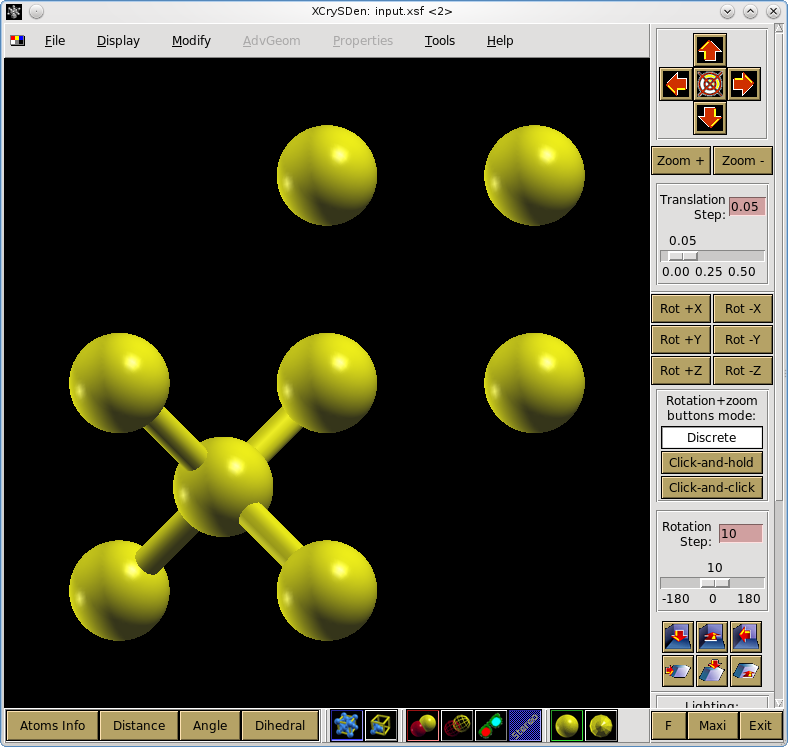" width="500" align="left"/>
</div>

Now you can play a little bit with the visualization program to make sure that you see indeed the diamond structure. Remember that we have supplied the primitive unit cell and not the conventional unit cell. This explains why you do not see something similar to what is normally printed in textbooks for solid-state physics.

<a id="RunExciting"></a>

<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Running Exciting</span>


In order to run **`exciting`** from the terminal, you simply need to execute the **exciting_smp** binary in the running directory. After a few seconds, the calculation should be finished.
    
<div style="background-color: rgb(224, 224, 224);">
    
```bash
time exciting_smp
```
</div>  
    
Here we used the **time** command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.


In [4]:
%%bash
cd run_tutorial_start_exciting_calculation
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml


   Elapsed time = 0m9s


<a id="INFOOUT"></a>

<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Reading INFO.OUT, the Main Output File</span>

The execution of **`exciting`** will produce a number of output files. More details about these files will be given in the next section. Here, we will focus on the **<span style="color:firebrick">main output file</span>**, named **INFO.OUT**. It contains basic information about the calculation. Below, this file is discussed for the diamond example and for the default value (**"normal"**) of the attribute <code><span style="color:mediumblue">outputlevel</span></code> of the <code><span style="color:green">groundstate</span></code> element.

 - The output file starts with a self-explanatory header.

In [13]:
!head -n 12 run_tutorial_start_exciting_calculation/INFO.OUT

| EXCITING NEON started                                                        =
| version hash id: 7c1164da04131375a877877c93da528c90669794                    =
|                                                                              =
| compiler: ifort (IFORT) 2021.3.0 20210609                                    =
|                                                                              =
|                                                                              =
| Date (DD-MM-YYYY) : 26-07-2023                                               =
| Time (hh:mm:ss)   : 17:23:48                                                 =
|                                                                              =
| All units are atomic (Hartree, Bohr, etc.)                                   =


- The next lines give information on the initial density and tell us that the initialization has started.

In [7]:
!head -n 20 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 7

********************************************************************************
* Ground-state run starting from atomic densities                              *
********************************************************************************
 
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+ Starting initialization                                                      +
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


- The next section contains lattice parameters and derived quantities.

In [8]:
!head -n 33 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 12

 Lattice vectors (cartesian) :
      0.0000000000      3.3637000000      3.3637000000
      3.3637000000      0.0000000000      3.3637000000
      3.3637000000      3.3637000000      0.0000000000
 
 Reciprocal lattice vectors (cartesian) :
     -0.9339693354      0.9339693354      0.9339693354
      0.9339693354     -0.9339693354      0.9339693354
      0.9339693354      0.9339693354     -0.9339693354
 
 Unit cell volume                           :      76.1170172117
 Brillouin zone volume                      :       3.2588010215


- The further bit contains the information about the chemical composition of the crystal.

In [9]:
!head -n 48 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 14

 Species :    1 (C)
     parameters loaded from                 :    C.xml
     name                                   :    carbon
     nuclear charge                         :      -6.00000000
     electronic charge                      :       6.00000000
     atomic mass                            :   21894.16673000
     muffin-tin radius                      :       1.45000000
     # of radial points in muffin-tin       :     250
 
     atomic positions (lattice) :
       1 :   0.00000000  0.00000000  0.00000000
       2 :   0.25000000  0.25000000  0.25000000
 
 Total number of atoms per unit cell        :       2


- The next section tells whether the calculation is a spin-polarized one.

In [10]:
!head -n 50 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 1

 Spin treatment                             :    spin-unpolarised


- The **`exciting`** code recognizes crystal symmetries automatically and reports what has been found.

In [11]:
!head -n 57 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 6

 Number of Bravais lattice symmetries       :      48
 Number of crystal symmetries               :      48
 
 k-point grid                               :       4    4    4
 Total number of k-points                   :       8
 k-point set is reduced with crystal symmetries


- The basis set related information is printed in the next section. Note that **`exciting`** uses different basis sets for the Kohn-Sham orbitals and the effective potential.

In [12]:
!head -n 71 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 13

 R^MT_min * |G+k|_max (rgkmax)              :       7.00000000
 Species with R^MT_min                      :       1 (C)
 Maximum |G+k| for APW functions            :       4.82758621
 Maximum |G| for potential and density      :      12.00000000
 
 G-vector grid sizes                        :      20    20    20
 Total number of G-vectors                  :    2229
 
 Maximum angular momentum used for
     APW functions                          :       8
     computing H and O matrix elements      :       8
     potential and density                  :       8
     inner part of muffin-tin               :       2


- Further computational details are printed below. The type of the exchange-correlation functional used in the calculation is among them.

In [13]:
!head -n 92 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 20

 Total nuclear charge                       :     -12.00000000
 Total electronic charge                    :      12.00000000
 Total core charge                          :       4.00000000
 Total valence charge                       :       8.00000000
 
 Number of empty states                     :       5
 Total number of valence states             :      10
 
 Maximum Hamiltonian size                   :     158
 Maximum number of plane-waves              :     150
 Total number of local-orbitals             :       8
 
 Exchange-correlation type                  :      22
     PBEsol, Phys. Rev. Lett. 100, 136406 (2008)
     Generalised gradient approximation (GGA)
 
 Smearing scheme                            :    Gaussian
 Smearing width                             :       0.00100000
 
 Using multisecant Broyden potential mixing


- Further, intermediate results are printed after each iteration of the **SCF** (self-consistent field) loop.

In [14]:
!head -n 137 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 29

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
+ SCF iteration number :    1                                                  +
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 Total energy                               :       -76.85604880
 _______________________________________________________________
 Fermi energy                               :         0.47006662
 Kinetic energy                             :        75.01766238
 Coulomb energy                             :      -141.28404834
 Exchange energy                            :       -10.09094085
 Correlation energy                         :        -0.49872199
 
 DOS at Fermi energy (states/Ha/cell)       :         0.00000000
 
 Electron charges :
     core                                   :         4.00000000
     core leakage                           :         0.00015896
     valence                                :         8.00000000
     interstitial 

- Actual values of the quantities which are relevant for self-consistency are displayed at each iteration (after the first one) and compared with convergence targets (shown in parentheses). If all self-consistency criteria are matched (values are smaller then targets) for the last 2 iterations the calculation has successfully ended.

In [15]:
!head -n 171 run_tutorial_start_exciting_calculation/INFO.OUT | tail -n 3

 RMS change in effective potential (target) :   2.73381      ( 0.100000E-05)
 Absolute change in total energy   (target) :  0.329777      ( 0.100000E-05)
 Charge distance                   (target) :  0.752460E-02  ( 0.100000E-04)


- The final answer is reported at the last iteration.

In [16]:
!tail -n 42 run_tutorial_start_exciting_calculation/INFO.OUT | head -n 28

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
| Convergency criteria checked for the last 2 iterations                       +
| Convergence targets achieved. Performing final SCF iteration                 +
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 Total energy                               :       -75.88903685
 _______________________________________________________________
 Fermi energy                               :         0.50878170
 Kinetic energy                             :        75.54873162
 Coulomb energy                             :      -140.90113420
 Exchange energy                            :       -10.03412623
 Correlation energy                         :        -0.50250803
 
 DOS at Fermi energy (states/Ha/cell)       :         0.00000000
 
 Electron charges :
     core                                   :         4.00000000
     core leakage                           :         0.00016223
  

- The final lines of **INFO.OUT** tell how the execution has stopped and report the total time spent in the run.

In [14]:
!tail -n 8 run_tutorial_start_exciting_calculation/INFO.OUT

********************************************************************************
* Groundstate module stopped                                                   *
********************************************************************************
 
 Total time spent (seconds)                 :         9.16
| EXCITING NEON stopped                                                        =


Notice, that if a **CAUTION** message is present, it is worth to have a look at the file **WARNING.OUT**. The **CAUTION** message could look like the following.

```
********************************************************************************
* Groundstate module stopped                                                   *
********************************************************************************

 Total time spent (seconds)                 :        11.29

--------------------------------------------------------------------------------
| CAUTION! Warnings have been written in file WARNING.OUT !                    -
--------------------------------------------------------------------------------

================================================================================
| EXCITING NEON stopped                                                    =
================================================================================
```

<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">4. Output Files of an exciting Calculation</span>


- The main output file in **`exciting`** is **INFO.OUT**. A detailed description of the content of this file can be found in the previous section.

filename|description
:-----------|:--------------------------------
**INFO.OUT**| Master output file containing the essential information on the material    system, parameters of the calculation, results (total energy, energy contributions, charge contributions, atomic forces, Fermi energy…) of each iteration, and more. The amount of information contained in this file can be triggered using the attribute <code><span style="color:mediumblue">outputlevel</span></code> of the <code><span style="color:green">groundstate</span></code> element.

&nbsp;

- Other relevant files which are updated or extended at each iteration contain information about the **SCF** calculation:

filename|description
:-----------|:--------------------------------
**TOTENERGY.OUT**| Total energy in [Ha]; each line corresponds to one **SCF** iteration.
**EFERMI.OUT**| Fermi energy in [Ha] at the last **SCF** iteration.
**RMSDVEFF.OUT**| Root-mean-square deviation of the effective potential; each line corresponds to one **SCF** iteration, starting from the 2nd iteration and not considering the last **SCF** iteration.
**DFSCFMAX.OUT**| Maximum variation of the non IBS part of the atomic forces; each line corresponds to one **SCF** iteration, starting from the 2nd iteration and not considering the last **SCF** iteration. Only written if forces are explicitly calculated (e.g., for atomic relaxation).
**EIGVAL.OUT**| Eigenvalues (energies) of the valence bands, for each **k**-point and band.
**EVALCORE.OUT**| Energy eigenvalues (energy levels) of the core states.
**LINENGY.OUT**| Linearization energies as fixed in the species files (if <code><span style="color:mediumblue">searchE</span></code> = **"false"** for the corresponding linearization energy in the **"species".xml** file) or determined by exciting (if <code><span style="color:mediumblue">searchE</span></code> = **"true"** for the corresponding linearization energy in the **"species".xml** file).

&nbsp;

- Output files containing structural information, symmetries, *etc.*:

filename|description
:-----------|:--------------------------------
**LATTICE.OUT**| Information on the lattice: Primitive lattice vectors, unit cell volume, reciprocal lattice vectors, *etc.*
**SYMCRYS.OUT**| Information on the symmetry operations of the crystal; more symmetry information are found in the files **SYMT2.OUT**, **SYMSITE.OUT**, **SYMMULT.OUT**, **SYMLAT.OUT**, **SYMINV.OUT**, and **SYMGENR.OUT**.
**KPOINTS.OUT**| List of **k**-points, their coordinates (in units of the reciprocal lattice vectors), weights, matrix size.
**BONDLENGTH.OUT**| Interatomic distances; useful to check the correctness of an input file.
**EQATOMS.OUT**| Information on equivalency of atoms due to the crystal symmetry.

&nbsp;

- Output files in **XML** format, useful for data storage, databases, *etc.*

filename|description
:-----------|:--------------------------------
**atoms.xml**| The results of calculations performed for atoms in order to initialize the electron density.
**info.xml**| The information contained in this file is similar to the one written in INFO.OUT, but displayed in the XML format.
**geometry.xml**| Structural information on the system. This will often be identical to the element <code><span style="color:green">structure</span></code> in your input file, but may differ for certain settings of the attributes in <code><span style="color:green">structure</span></code>, *e.g*., if <code><span style="color:mediumblue">primcell</span></code> = **"true"** or <code><span style="color:mediumblue">tshift</span></code> = **"true"**

&nbsp;

- Some of the output files are not directly readable, because they are written as binary files. They are used by **`exciting`** for current storage of vectors and matrices. They are relevant when restarting or extending an existing calculation.


filename|description
:-----------|:--------------------------------
**EVALFV.OUT**| First-variational eigenvalues.
**EVALSV.OUT**| Second-variational eigenvalues.
**EVECFV.OUT**| First-variational eigenvectors.
**EVECSV.OUT**| Second-variational eigenvectors..
**OCCSV.OUT** | Occupation of the second-variational states.
**STATE.OUT**| Real-space distribution of the density and the potential

- Both **<span style="color:firebrick">initial</span>** (*e.g.*, **C.xml**) and **<span style="color:firebrick">self-consistent</span>** (*e.g.*, **C_scf.xml**) **speciesfiles** are also saved, at the end of the run, in the working directory. These files specify which basis functions are used for each element in a calculation performed with **`exciting`**.

<hr style="border:2px solid #DDD"> </hr>